## EDA on Electric Vehicle

In [1]:
import numpy as np
import pandas as pd

In [2]:
ev_data = pd.read_csv('dataset.csv')
ev_data.sample(4)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
85583,JHMZC5F36L,Island,Langley,WA,98260,2020,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,10.0,142737136,POINT (-122.40618 48.0399),PUGET SOUND ENERGY INC,53029971900
65709,WMW13DJ06P,King,Seattle,WA,98144,2023,MINI,HARDTOP,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,37.0,218412876,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009500
98491,5YJ3E1EA0K,King,Sammamish,WA,98074,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,45.0,259598153,POINT (-122.02054 47.60326),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032216
91588,5YJ3E1EA8M,King,Bellevue,WA,98004,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,166462565,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023901


## Step 1: Copy the Data  
&emsp;Copy the original DataFrame to avoid modifying the original data


In [3]:
data = ev_data.copy()


### Step 1.1 Check the first few records

In [4]:
data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


### Step 1.2 Check the structure of the dataset

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

<div style="font-family: Arial, sans-serif; border: 1px solid #333938; padding: 10px; border-radius: 5px; background-color: #e5eeec; width: 100%;">
  <h3 style="color: #4CAF50; text-align: center;">Key Insights from data.info()</h3>
  <ul style="padding-left: 20px; color: #333;"> <!-- Set the text color to black -->
    <li><strong>Number of Entries:</strong> There are 112,634 rows and 17 columns.</li>
    <li><strong>Column Types:</strong>
      <ul style="padding-left: 20px; color: #333;"> <!-- Set the text color to black -->
        <li>6 integer columns (int64)</li>
        <li>1 float column (float64)</li>
        <li>10 object columns (mostly strings like VIN, City, Make, etc.)</li>
      </ul>
    </li>
    <li><strong>Missing Values:</strong> Some columns have missing values, as indicated by the non-null counts:
      <ul style="padding-left: 20px; color: #333;"> <!-- Set the text color to black -->
        <li>Model: 20 missing values</li>
        <li>Legislative District: 286 missing values</li>
        <li>Vehicle Location: 24 missing values</li>
        <li>Electric Utility: 443 missing values</li>
      </ul>
    </li>
  </ul>
</div>


### Based on the data types provided, there are indeed a few columns that could be better represented in different formats:

In [6]:
data['Postal Code'] = data['Postal Code'].astype('object')

# Convert categorical columns to category type
categorical_columns = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Vehicle Location', 'Electric Utility']
for col in categorical_columns:
    data[col] = data[col].astype('category')



### Step 1.3 Check for missing values


In [7]:

data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

<div style="font-family: Arial, sans-serif; border: 1px solid  #333938 ; padding: 10px; border-radius: 5px; background-color:  #e5eeec; width: 100%;">
  <h3 style="color: #4CAF50; text-align: center;">Missing Values Summary</h3>
  <ul style="padding-left: 20px;">
  <span style = "color:  #333938 ; text-align: left;" > 
    <li>
      <strong>Model:</strong>20 missing values </span> 
    </li>
    <li>
    <strong>Legislative District:</strong>
      286 missing values
    </li>
    <li>
      <strong>Vehicle Location:</strong> 24 missing values
    </li>
    <li>
      <strong>Electric Utility:</strong> 443 missing values
    </li>
  </span>
  </ul>
</div>


<div style="font-family: Arial, sans-serif; border: 1px solid #333938; padding: 10px; border-radius: 5px; background-color: #e5eeec; width: 100%;">
  <h3 style="color: #4CAF50; text-align: center;">Handling Missing Values</h3>
  <p style="color: #333;"> <!-- Set the text color to black -->
    To handle missing values in our dataset, we can drop rows with missing values in the <strong>Model</strong> column and fill other missing values with <strong>"Unknown"</strong>. This ensures our data remains useful for analysis while minimizing loss of information.
  </p>
</div>


In [8]:
data = data.dropna(subset=['Model'])


In [9]:
# Check the data types of the relevant columns
print(data[['Legislative District', 'Vehicle Location', 'Electric Utility']].dtypes)

# Convert to categorical type if not already
for col in ['Legislative District', 'Vehicle Location', 'Electric Utility']:
    if data[col].dtype != 'category':
        data[col] = data[col].astype('category')

# Adding 'Unknown' as a category to categorical columns if not already present
for col in ['Legislative District', 'Vehicle Location', 'Electric Utility']:
    # Add 'Unknown' category
    if 'Unknown' not in data[col].cat.categories:
        data[col] = data[col].cat.add_categories(['Unknown'])
    
    # Fill missing values
    data[col].fillna('Unknown', inplace=True)


Legislative District     float64
Vehicle Location        category
Electric Utility        category
dtype: object


C:\Users\pc\AppData\Local\Temp\ipykernel_13720\2101814684.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)


### Step 1.4 Check for duplicate rows

In [10]:
data.duplicated().sum()


0

<div style="font-family: Arial, sans-serif; border: 1px solid #333938; padding: 10px; border-radius: 5px; background-color: #e5eeec; width: 100%;">
  <h3 style="color: #4CAF50; text-align: center;">Summary So Far</h3>
  <ul style="padding-left: 20px; color: #333;">
    <li><strong>Data Shape:</strong> 112,634 rows and 17 columns.</li>
    <li><strong>Missing Values:</strong> We handled the missing values in specific columns.</li>
    <li><strong>No Duplicates:</strong> Your dataset is clean from duplicate entries.</li>
  </ul>
</div>


## Step 2: Descriptive Statistics

,Legislative District,count
0,41.0,7602
1,45.0,7112
2,48.0,6460
3,36.0,5251
4,46.0,4721


In [56]:

pd.options.display.float_format = '{:,.0f}'.format
data.describe()


,Model Year,Electric Range,Base MSRP,DOL Vehicle ID,2020 Census Tract
count,"112,614","112,614","112,614","112,614","112,614"
mean,"2,019",88,"1,794","199,452,869","52,966,483,299"
std,3,102,"10,785","93,992,169","1,699,255,109"
min,"1,997",0,0,"4,777","1,101,001,400"
25%,"2,017",0,0,"148,410,153","53,033,008,500"
50%,"2,020",32,0,"192,384,436","53,033,029,305"
75%,"2,022",208,0,"219,186,495","53,053,072,506"
max,"2,023",337,"845,000","479,254,772","56,033,000,100"


<div style="font-family: Arial, sans-serif; border: 1px solid #333938; padding: 10px; border-radius: 5px; background-color: #e5eeec; width: 100%;">
  <h3 style="color: #4CAF50; text-align: center;">Summary of Numerical Columns</h3>
  <ul style="padding-left: 20px; color: #333;">
    <li><strong>Model Year:</strong>
      <ul style="padding-left: 20px; color: #333;">
        <li>Mean: 2019, indicating that most vehicles in the dataset are relatively recent.</li>
        <li>Min/Max: The dataset contains vehicles from 1997 to 2023.</li>
      </ul>
    </li>
    <li><strong>Electric Range:</strong>
      <ul style="padding-left: 20px; color: #333;">
        <li>Mean: Approximately 87.83 miles, which is a reasonable average for electric vehicles.</li>
        <li>Min: 0 miles, which might indicate some vehicles with unspecified ranges or entry errors.</li>
        <li>Max: 337 miles, showing that some electric vehicles can travel significant distances.</li>
      </ul>
    </li>
    <li><strong>Base MSRP (Manufacturer's Suggested Retail Price):</strong>
      <ul style="padding-left: 20px; color: #333;">
        <li>Mean: $1,793.76, but with a high standard deviation ($10,784.68), indicating a large variation in prices.</li>
        <li>Min: $0, which may sug


<div style="font-family: Arial, sans-serif; border: 1px solid #333938; padding: 10px; border-radius: 5px; background-color: #e5eeec; width: 100%;">
  <h3 style="color: #4CAF50; text-align: center;">Insights and Next Steps</h3>
  <ul style="padding-left: 20px; color: #333;">
    <li><strong>Potential Data Issues:</strong> The presence of zeros in the Electric Range and Base MSRP columns suggests that there may be entries that need further investigation or cleaning.</li>
    <li><strong>Recent Trends:</strong> The Model Year column suggests that this dataset is focused on relatively recent electric vehicles.</li>
  </ul>
</div>



## Step 3: Univariate Analysis

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 3.1 Univariate Analysis for Numerical Columns

<Axes: xlabel='Model Year', ylabel='Count'>

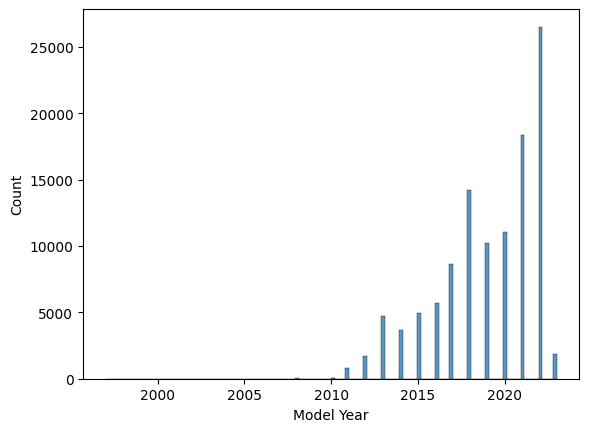

In [16]:
sns.histplot(data=data['Model Year'])

The histogram shows a strongly right-skewed distribution of car model years. Here are some key insights:

* **Recent Model Years Dominate:** The vast majority of cars in the dataset are from recent model years, with a sharp increase in counts from 2015 onwards. The peak is at 2021, indicating a very high concentration of very new cars.
* **Older Cars are Rare:**  There are very few cars from model years before 2010. This suggests that older cars are less common, possibly due to factors like being phased out, scrapped, or simply not included in the dataset.
* **Potential Bias:** The heavy concentration on recent years suggests a potential bias in the data collection. The data might come from a source that primarily deals with newer cars, like a dealership specializing in new or nearly new vehicles. 
* **Limited Historical View:**  The lack of older cars limits the ability to draw conclusions about long-term trends in car model years. 

<Axes: xlabel='Electric Range', ylabel='Count'>

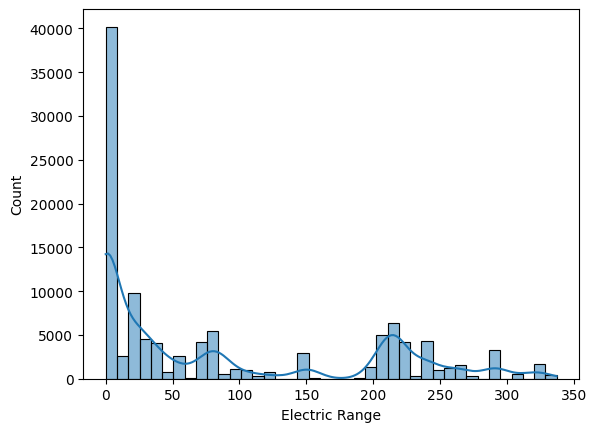

In [58]:
sns.histplot(data=data['Electric Range'],kde=True)


**Insights:**

* **Dominance of Short-Range EVs:** The histogram is heavily right-skewed with a massive peak at the very low end of the electric range (likely under 10 miles). This suggests that a significant portion of the vehicles in the dataset have a very limited electric range. These are likely plug-in hybrid electric vehicles (PHEVs) with a small electric battery capacity.
* **Clusters around Specific Ranges:** There are distinct clusters of vehicles around certain electric range values:
    * Around 25-50 miles: This cluster likely represents another common segment of PHEVs with slightly larger battery capacities.
    * Around 200-250 miles: This cluster likely represents a popular range for all-electric vehicles (BEVs), indicating a sweet spot balancing cost and range.
* **Sparse Long-Range EVs:**  The number of vehicles with electric ranges above 300 miles is relatively low, indicating that these long-range models are less common in the dataset. This could be due to their higher cost or simply because the data was collected before these models became widely available.

**Additional Notes:**

* **Context is Key:**  Without knowing the specific dataset and its collection period, it's difficult to draw definitive conclusions. For example, if the data is older, it might not accurately reflect the current electric vehicle market where longer ranges are becoming more common.
* **Outliers:** The very high peak at the low end of the range could indicate potential outliers or data entry errors. It's worth investigating these data points further to ensure data quality. 


<Axes: ylabel='Electric Range'>

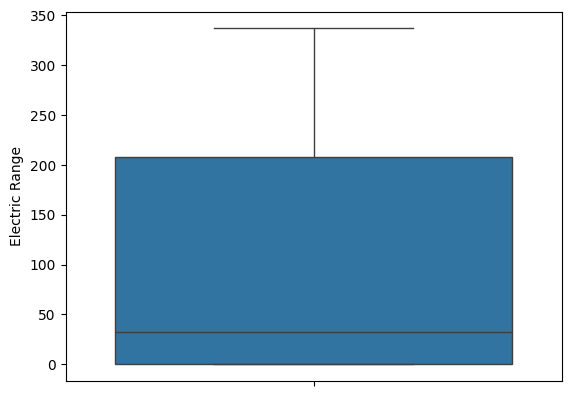

In [22]:
sns.boxplot(data=data['Electric Range'])

<Axes: xlabel='Base MSRP', ylabel='Count'>

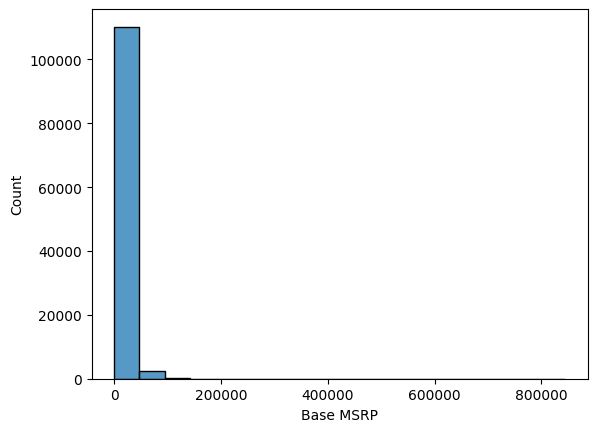

In [18]:
sns.histplot(data=data['Base MSRP'])

<Axes: ylabel='Base MSRP'>

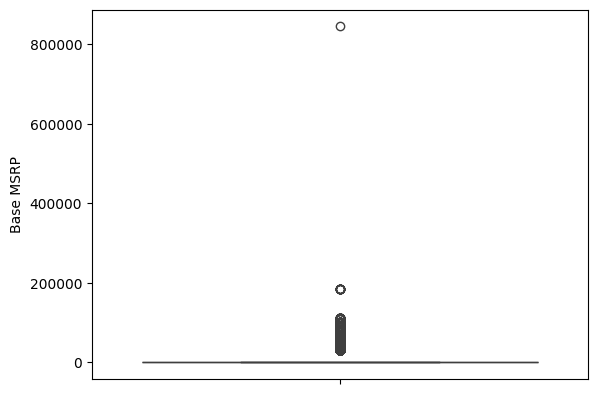

In [23]:
sns.boxplot(data=data['Base MSRP'])

#### 3.2 Univariate Analysis for Categorical Columns

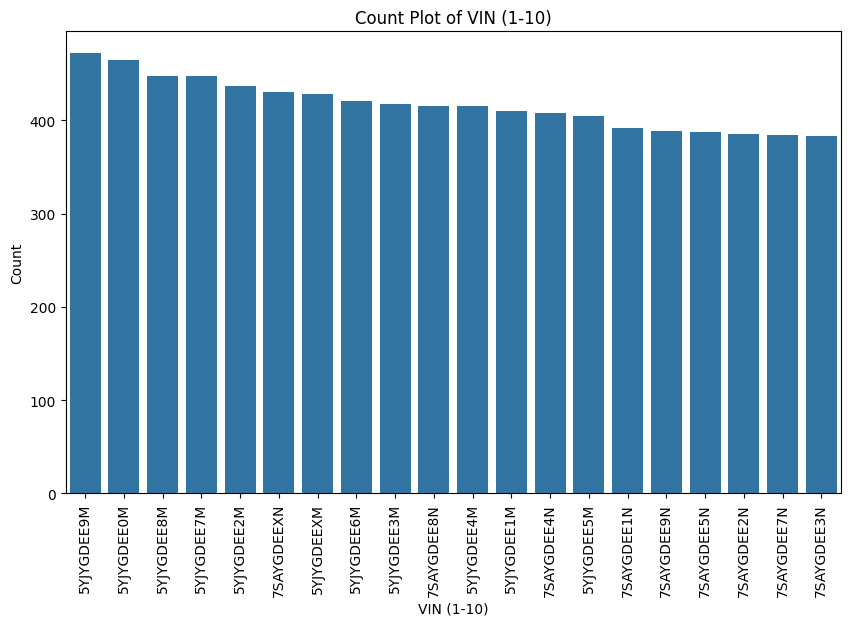

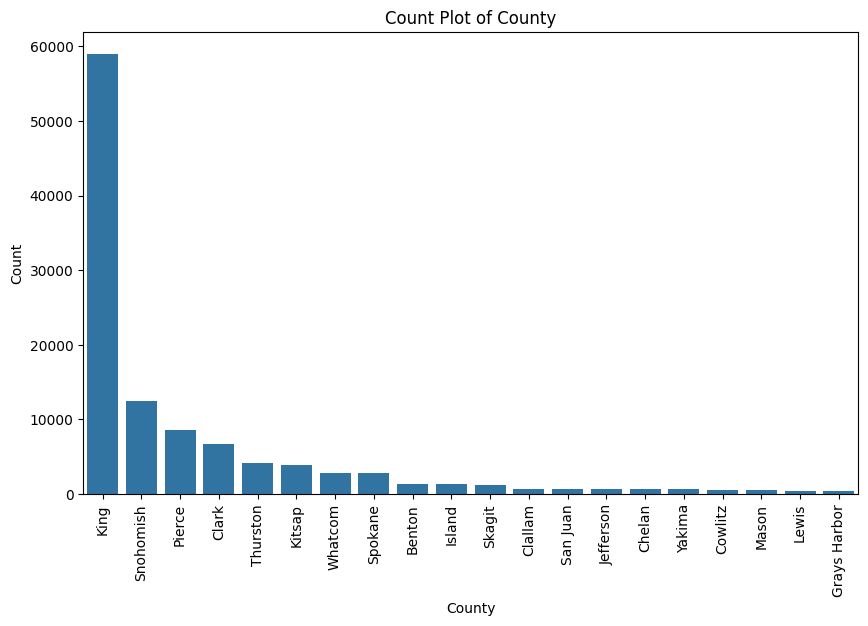

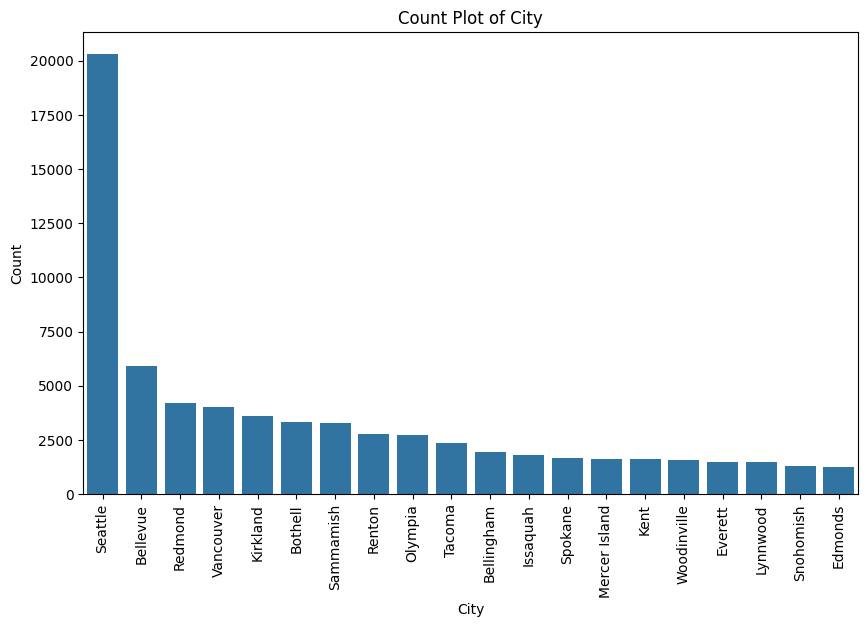

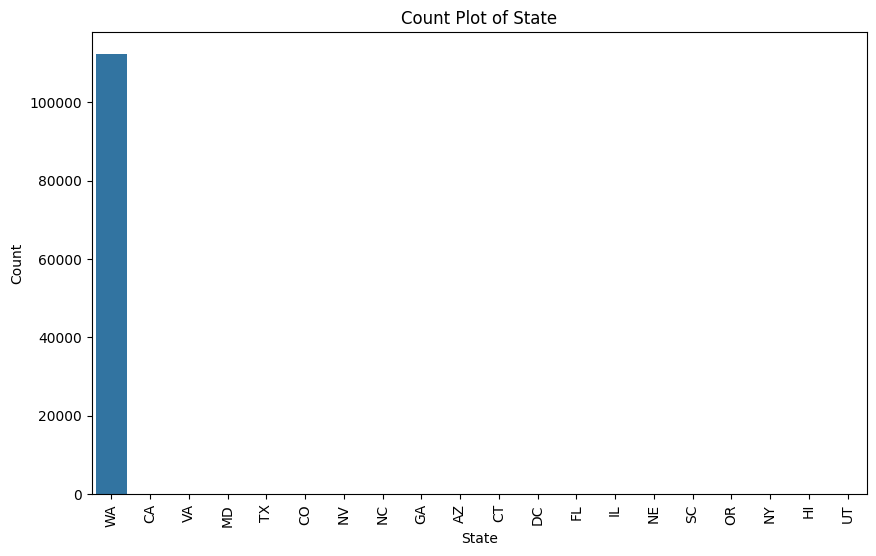

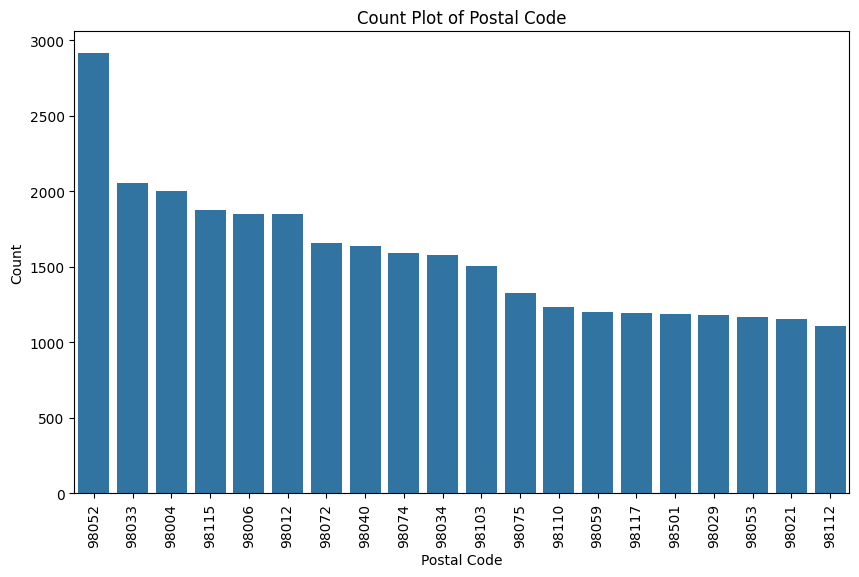

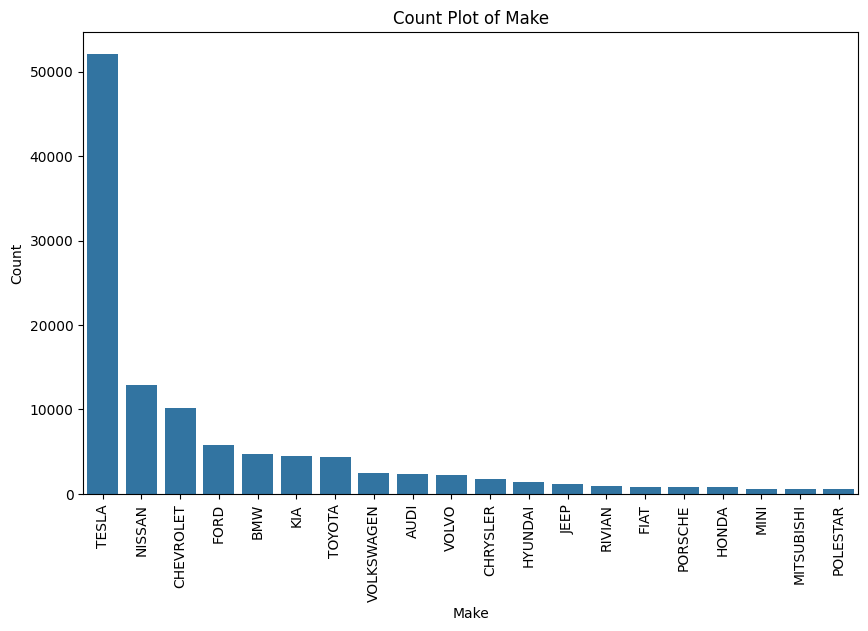

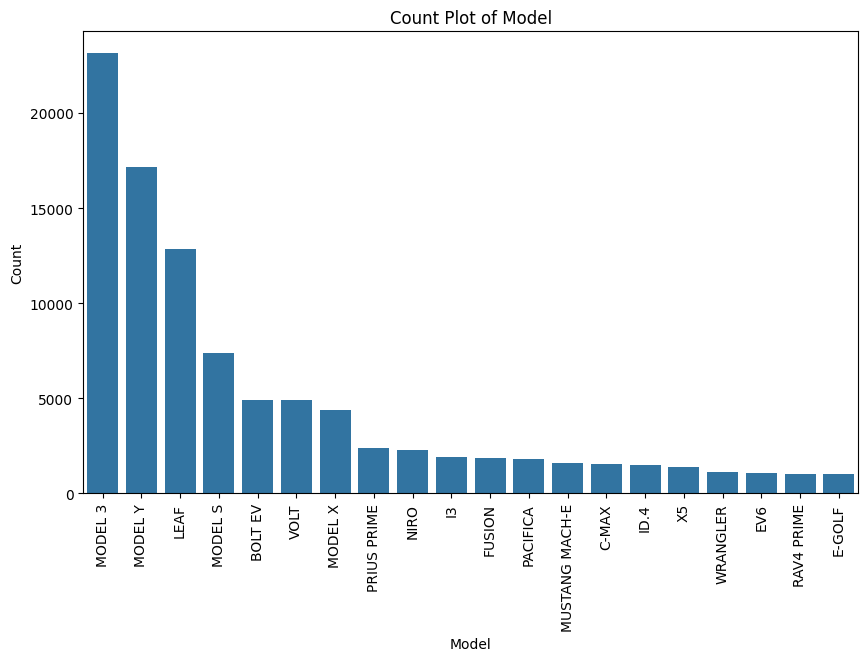

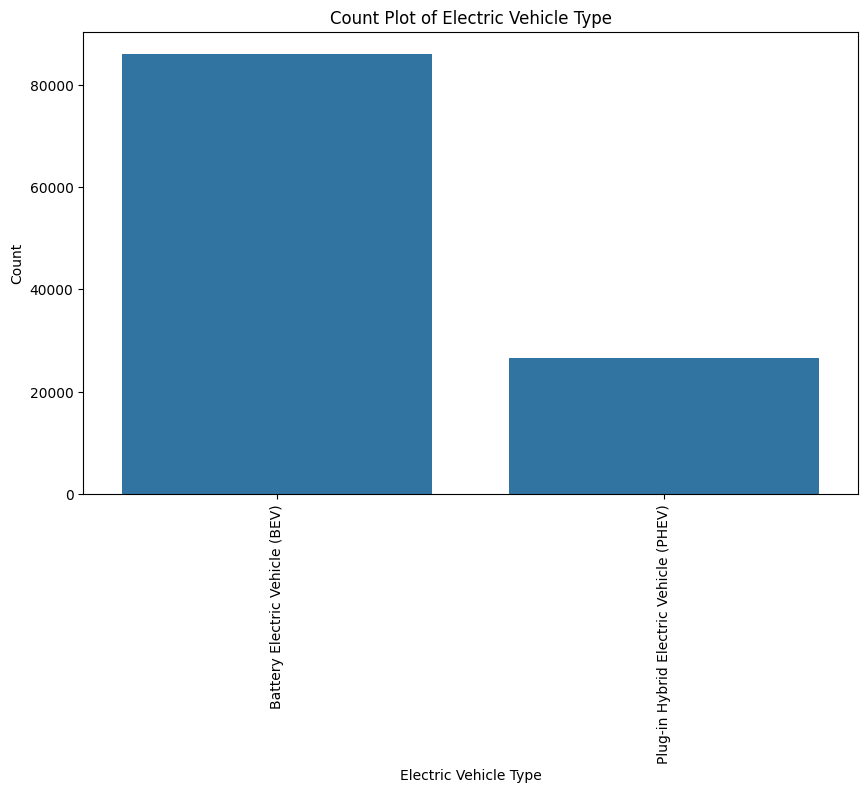

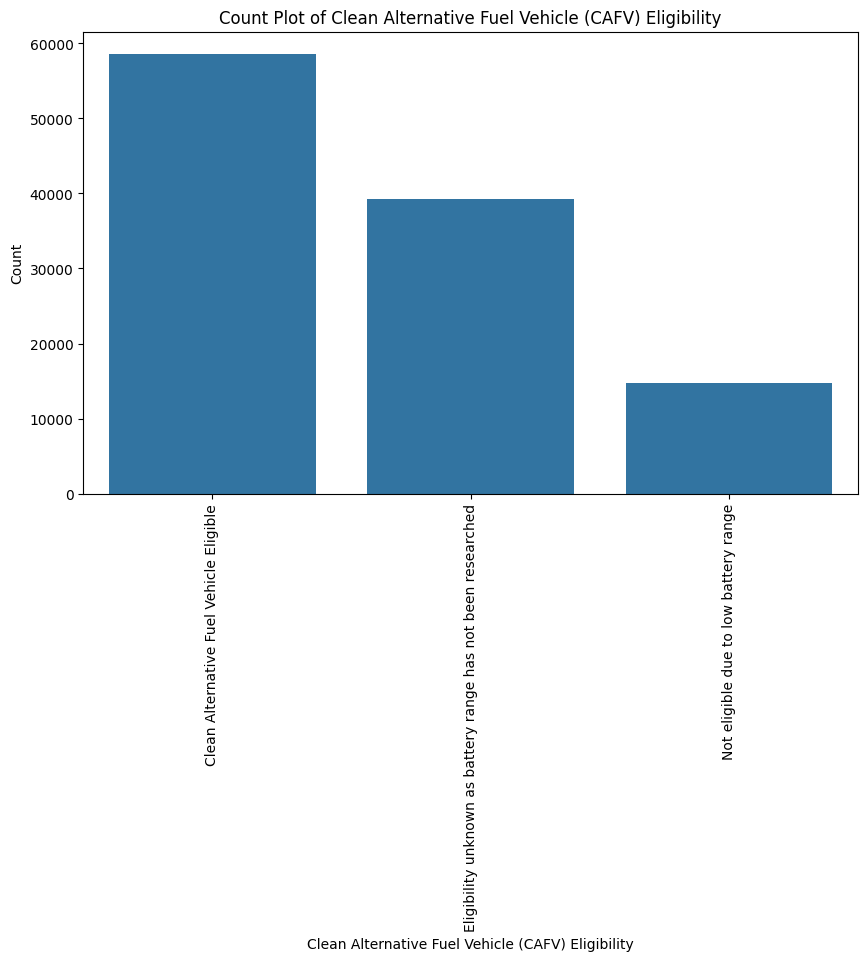

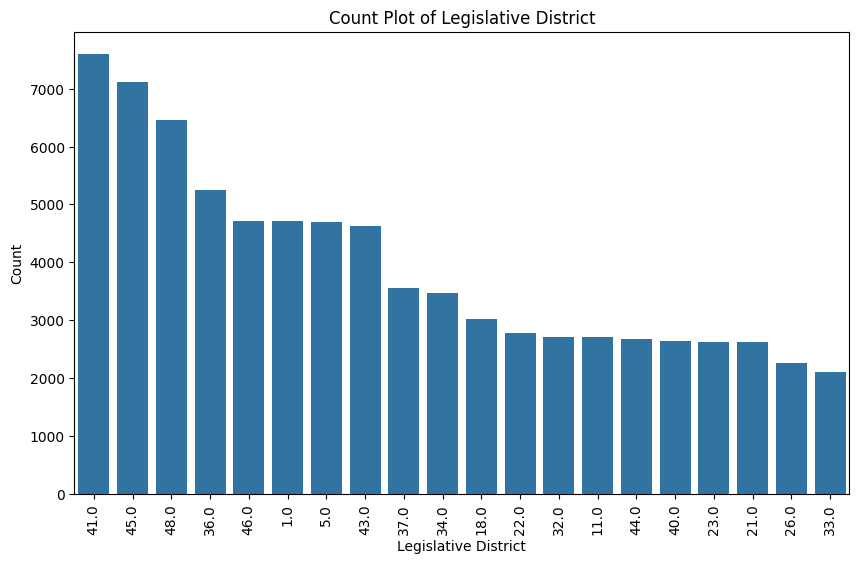

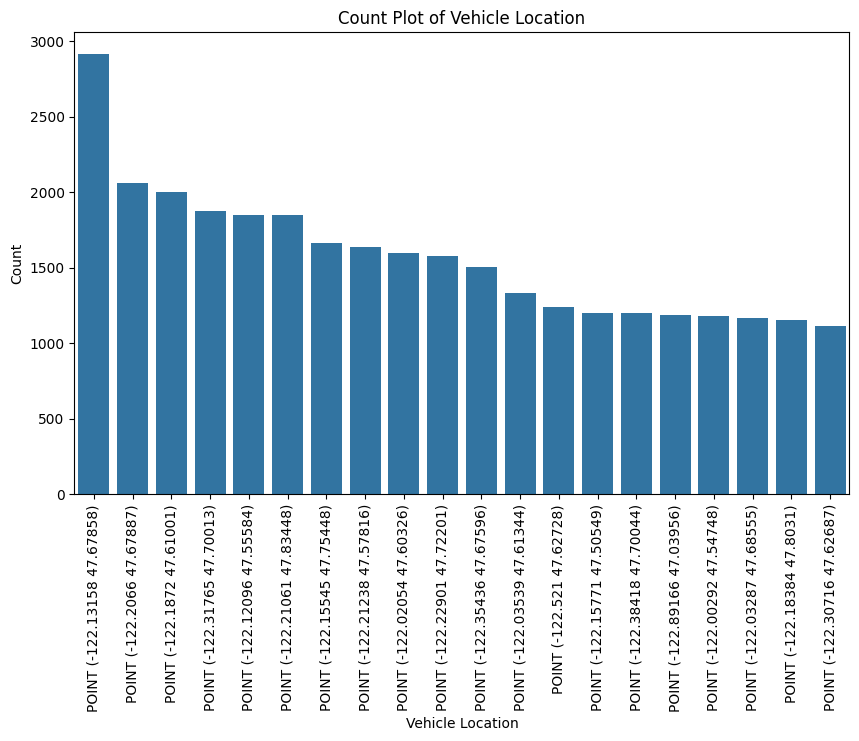

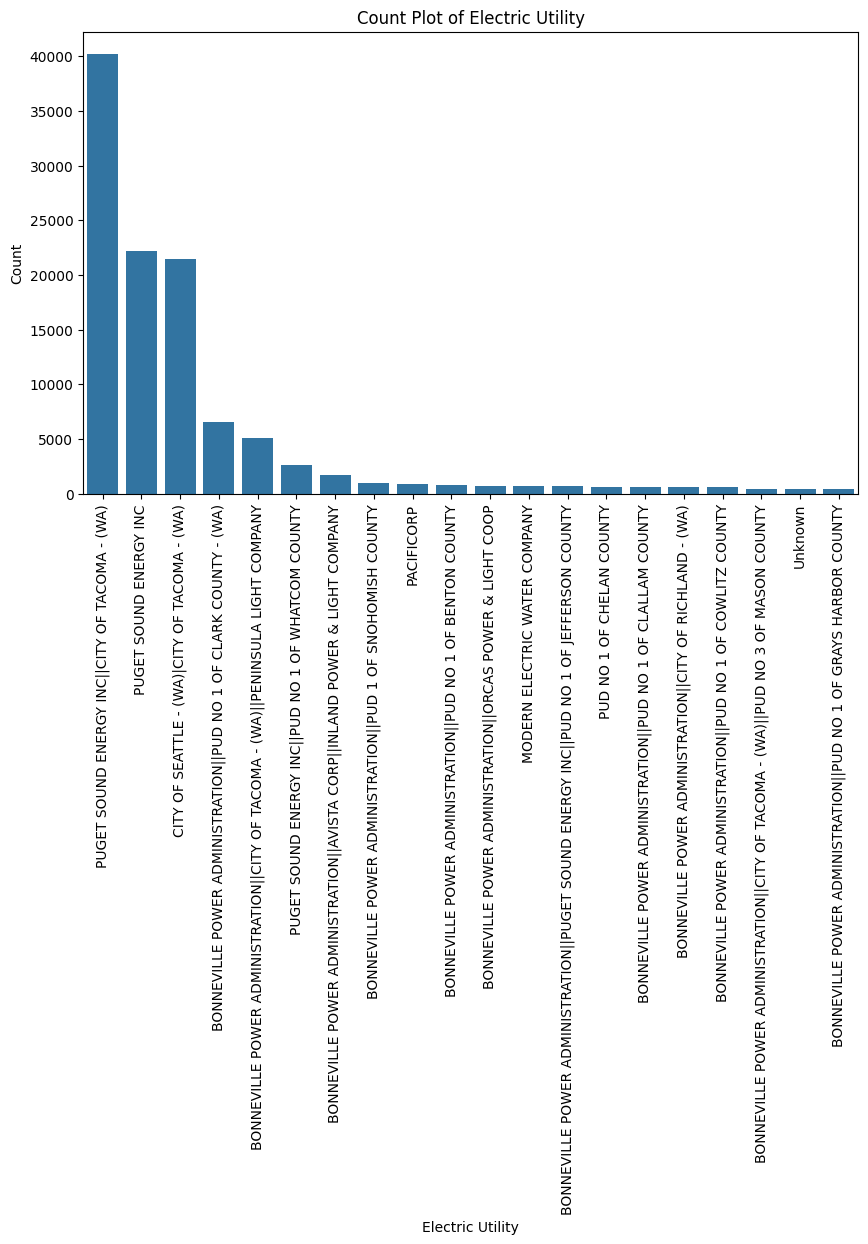

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get categorical columns
categorical_cols = data.select_dtypes(include=['category', 'object']).columns

# Loop through each categorical column and plot separately
for column in categorical_cols:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.countplot(x=data[column], order=data[column].value_counts().index[:20])  # Top 10 categories
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)  # Optional: Add x-axis label for clarity
    plt.xticks(rotation = 90)
    plt.ylabel('Count')  # Optional: Add y-axis label
    plt.show()  # Show each plot one by one


In [79]:
import plotly.express as px

# Group by Model Year and count number of vehicles
model_year_counts = data.groupby('Model Year')['VIN (1-10)'].count().reset_index()
model_year_counts.columns = ['Model Year', 'Number of EVs']

# Line chart to show number of EVs over years
fig = px.line(
    model_year_counts,
    x='Model Year',
    y='Number of EVs',
    title='Number of Electric Vehicles by Model Year',
    markers=True
)

fig.show()


In [80]:
import plotly.express as px

# Count of vehicles based on CAFV Eligibility
cafv_counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().reset_index()
cafv_counts.columns = ['CAFV Eligibility', 'Count']

# Pie chart of CAFV eligibility
fig = px.pie(
    cafv_counts,
    names='CAFV Eligibility',
    values='Count',
    title='Clean Alternative Fuel Vehicle (CAFV) Eligibility Distribution'
)

fig.show()


### Task 2:  Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [77]:
import pandas as pd
import plotly.express as px

# Group the data by State and count the number of vehicles (VIN)
ev_counts = data.groupby('State')['VIN (1-10)'].count().reset_index()
ev_counts.columns = ['State', 'Number of EVs']

# Create the choropleth map
fig = px.choropleth(
    ev_counts,
    locations='State',  # Use the state abbreviation as the location
    locationmode='USA-states',  # Built-in location mode for US states
    color='Number of EVs',  # Column to color by
    color_continuous_scale='Viridis',  # Color scale
    title='Number of Electric Vehicles by State',
    scope='usa',  # Focus on the USA
)

# Update layout for better visibility and enlarge the map
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},  # Remove margins around the map
    width=800,  # Set the width to make the map larger
    height=500,  # Set the height to make the map larger
)

# Show the plot
fig.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_13720\1787076792.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [87]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame containing the EV data
# Group the data by 'Model Year' and 'Make' to count the number of vehicles per year per make
ev_make_counts = data.groupby(['Model Year', 'Make'])['VIN (1-10)'].count().reset_index()
ev_make_counts.columns = ['Model Year', 'Make', 'Number of EVs']

# Create an animated bar plot
fig = px.bar(
    ev_make_counts, 
    x='Make', 
    y='Number of EVs', 
    color='Make',  # Color by vehicle make
    animation_frame='Model Year',  # Use model year for animation
    animation_group='Make',  # Group the bars by make
    range_y=[0, ev_make_counts['Number of EVs'].max() + 1000],  # Set y-axis range dynamically
    title='Racing Bar Plot: Number of Electric Vehicles by Make Over Time'
)

# Update layout to improve readability
fig.update_layout(
    xaxis_title='Vehicle Make',
    yaxis_title='Number of EVs',
    showlegend=False,  # Hide the legend
    autosize=True,
    margin={"r": 0, "t": 50, "l": 20, "b": 100},  # Adjust margins
    width=800,  # Set the width to make the plot larger
    height=500,  # Set the height to make the plot larger
    title_x=0.5,  # Center the title
    xaxis_tickangle=-90,  # Rotate the x-axis labels for better readability
)

# Adjust the font size of the axis labels and title
fig.update_xaxes(tickfont=dict(size=10))  # Reduce the font size of x-axis labels
fig.update_yaxes(tickfont=dict(size=10))  # Reduce the font size of y-axis labels
fig.update_layout(title_font=dict(size=18))  # Set title font size

# Show the animated bar plot
fig.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_13720\2442033809.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [90]:
from pptx import Presentation
from pptx.util import Inches

# Create a PowerPoint presentation object
ppt = Presentation()

# Title Slide
slide = ppt.slides.add_slide(ppt.slide_layouts[0])
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Exploratory Data Analysis of Electric Vehicles Dataset"
subtitle.text = "Insights on Electric Vehicle Trends and Market Overview\nMD Qamar\nDate"

# Introduction Slide
slide = ppt.slides.add_slide(ppt.slide_layouts[1])
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Introduction"
content.text = ("This analysis aims to explore the electric vehicle dataset, "
                "perform univariate and bivariate analysis, and provide insights on "
                "electric vehicle trends across various states and years.")

# Dataset Overview Slide
slide = ppt.slides.add_slide(ppt.slide_layouts[1])
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Dataset Overview"
content.text = ("- Number of rows: 112,634\n"
                "- Key features: VIN, County, City, State, Model Year, Make, "
                "Electric Vehicle Type, Base MSRP, etc.\n"
                "- Data source and preprocessing steps (handling missing values, data types).")

# Univariate Analysis Slide
slide = ppt.slides.add_slide(ppt.slide_layouts[1])
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Univariate Analysis"
content.text = ("- Brief explanation of univariate analysis.\n"
                "- Insert histogram or bar plot here (e.g., distribution of Model Year).\n"
                "- Insert boxplot here (e.g., Base MSRP or Electric Range).")

# Bivariate Analysis Slide
slide = ppt.slides.add_slide(ppt.slide_layouts[1])
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Bivariate Analysis"
content.text = ("- Explanation of the relationship between two variables (e.g., Make vs. Base MSRP).\n"
                "- Insert scatter plots or correlation heatmaps here.\n"
                "- Discuss insights from the analysis.")

# Geographic Analysis Slide
slide = ppt.slides.add_slide(ppt.slide_layouts[1])
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Geographic Analysis (Choropleth Map)"
content.text = ("- Insert Choropleth Map here (Number of Electric Vehicles by State).\n"
                "- Briefly describe insights (e.g., States leading in EV registrations).")

# Racing Bar Plot Slide
slide = ppt.slides.add_slide(ppt.slide_layouts[1])
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Racing Bar Plot"
content.text = ("- Insert video or GIF here of the Racing Bar Plot showing growth of EV manufacturers over time.\n"
                "- Discuss insights from the animation (e.g., how Tesla and Chevrolet dominated the market).")

# Key Insights Slide
slide = ppt.slides.add_slide(ppt.slide_layouts[1])
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Key Insights"
content.text = ("- Tesla and Chevrolet are the top EV manufacturers in recent years.\n"
                "- Majority of electric vehicles have been produced after 2015.\n"
                "- California and Washington have the largest number of EVs registered.")

# Conclusion Slide
slide = ppt.slides.add_slide(ppt.slide_layouts[1])
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Conclusion"
content.text = ("- Summarize key findings and how this analysis could guide future research.\n"
                "- Mention potential next steps like more detailed trend analysis or policy recommendations.")

# Q&A Slide
slide = ppt.slides.add_slide(ppt.slide_layouts[1])
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Questions?"
content.text = "Thank you!\nAny questions?"

# Save the presentation
ppt_file_path = "Electric_Vehicles_Analysis_Presentation.pptx"
ppt.save(ppt_file_path)

ppt_file_path


'Electric_Vehicles_Analysis_Presentation.pptx'

In [92]:
from pptx import Presentation
from pptx.util import Inches

# Create a new PowerPoint presentation
prs = Presentation()

# Slide 1: Title Slide
slide_1 = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_1.shapes.title
subtitle = slide_1.placeholders[1]
title.text = "Exploratory Data Analysis of Electric Vehicles"
subtitle.text = "An analysis based on various factors influencing Electric Vehicle sales."

# Slide 2: Introduction
slide_2 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_2.shapes.title
content = slide_2.placeholders[1]
title.text = "Introduction"
content.text = (
    "This presentation covers the exploratory data analysis (EDA) performed "
    "on a dataset of electric vehicles (EVs). The analysis includes insights "
    "about the distribution of EV makes, trends over the years, and the impact "
    "of various factors on EV sales."
)

# Slide 3: Data Overview
slide_3 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_3.shapes.title
content = slide_3.placeholders[1]
title.text = "Data Overview"
content.text = (
    "The dataset consists of 112,634 entries and 17 columns. Key features include:\n"
    "- VIN (1-10): Unique identifier for vehicles\n"
    "- Model Year: Year of manufacture\n"
    "- Make: Manufacturer of the vehicle\n"
    "- Electric Range: Range of the vehicle on a full charge\n"
    "- Base MSRP: Manufacturer's suggested retail price\n"
    "\n"
    "The dataset has been cleaned and preprocessed for analysis."
)

# Slide 4: Univariate Analysis - Histograms
slide_4 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_4.shapes.title
content = slide_4.placeholders[1]
title.text = "Univariate Analysis: Histograms"
content.text = (
    "Histograms provide a visual representation of the distribution of numerical variables.\n"
    "The following plots showcase the distributions of key numerical features in the dataset:\n"
    "Insert plots here for histograms of relevant numerical columns."
)

# Slide 5: Univariate Analysis - Box Plots
slide_5 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_5.shapes.title
content = slide_5.placeholders[1]
title.text = "Univariate Analysis: Box Plots"
content.text = (
    "Box plots offer insights into the distribution of numerical variables and highlight "
    "any potential outliers.\n"
    "Insert plots here for box plots of relevant numerical columns."
)

# Slide 6: Bivariate Analysis - Count Plots
slide_6 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_6.shapes.title
content = slide_6.placeholders[1]
title.text = "Bivariate Analysis: Count Plots"
content.text = (
    "Count plots illustrate the relationship between categorical variables and the count of occurrences.\n"
    "Insert plots here for count plots of relevant categorical columns."
)

# Slide 7: Choropleth Map
slide_7 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_7.shapes.title
content = slide_7.placeholders[1]
title.text = "Choropleth Map"
content.text = (
    "A choropleth map displays the number of electric vehicles based on state locations.\n"
    "Insert the choropleth plot here."
)

# Slide 8: Racing Bar Plot
slide_8 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_8.shapes.title
content = slide_8.placeholders[1]
title.text = "Racing Bar Plot"
content.text = (
    "The racing bar plot visualizes the count of electric vehicles by make over the years.\n"
    "Insert the racing bar plot here."
)

# Slide 9: Conclusion
slide_9 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_9.shapes.title
content = slide_9.placeholders[1]
title.text = "Conclusion"
content.text = (
    "The exploratory data analysis provides valuable insights into the trends and distribution "
    "of electric vehicles across different manufacturers and years. This analysis can aid stakeholders "
    "in understanding the EV market dynamics."
)

# Save the presentation
pptx_path = 'EVA_Electric_Vehicles2.pptx'
prs.save(pptx_path)

pptx_path


'EVA_Electric_Vehicles2.pptx'